## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

## EDA

In [2]:
nba = pd.read_csv("nba_2013.csv")
nba

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013
5,Cole Aldrich,C,25,NYK,46,2,330,33,61,0.541,...,92,129,14,8,30,18,40,92,2013-2014,2013
6,LaMarcus Aldridge,PF,28,POR,69,69,2498,652,1423,0.458,...,599,765,178,63,68,123,147,1603,2013-2014,2013
7,Lavoy Allen,PF,24,TOT,65,2,1072,134,300,0.447,...,192,311,71,24,33,44,126,303,2013-2014,2013
8,Ray Allen,SG,38,MIA,73,9,1936,240,543,0.442,...,182,205,143,54,8,84,115,701,2013-2014,2013
9,Tony Allen,SG,32,MEM,55,28,1278,204,413,0.494,...,129,208,94,90,19,90,121,495,2013-2014,2013


In [3]:
nba.isnull().any()

player          False
pos             False
age             False
bref_team_id    False
g               False
gs              False
mp              False
fg              False
fga             False
fg.              True
x3p             False
x3pa            False
x3p.             True
x2p             False
x2pa            False
x2p.             True
efg.             True
ft              False
fta             False
ft.              True
orb             False
drb             False
trb             False
ast             False
stl             False
blk             False
tov             False
pf              False
pts             False
season          False
season_end      False
dtype: bool

In [4]:
nba.dtypes

player           object
pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
season           object
season_end        int64
dtype: object

In [5]:
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


###### Checking for null items

In [6]:
nba.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

###### Filling as many are missing

In [7]:
nba["x3p."].fillna(nba["x3p."].mean(),inplace=True)
nba["ft."].fillna(nba["ft."].mean(),inplace=True)

###### Dropping as less than 5 are missing

In [8]:
nba.dropna(subset=['fg.'], inplace=True)
nba.dropna(subset=['x2p.'], inplace=True)
nba.dropna(subset=['efg.'], inplace=True)

###### Final null checking

In [9]:
nba.isna().any().sum()

0

In [10]:
print(nba.columns.values)

['player' 'pos' 'age' 'bref_team_id' 'g' 'gs' 'mp' 'fg' 'fga' 'fg.' 'x3p'
 'x3pa' 'x3p.' 'x2p' 'x2pa' 'x2p.' 'efg.' 'ft' 'fta' 'ft.' 'orb' 'drb'
 'trb' 'ast' 'stl' 'blk' 'tov' 'pf' 'pts' 'season' 'season_end']


###### Drop string columns as useless

In [11]:
df = nba.copy()
df.drop('player', inplace=True, axis=1)
df.drop('bref_team_id', inplace=True, axis=1)
df.drop('season', inplace=True, axis=1)
df.drop('season_end', inplace=True, axis=1)

In [12]:
df.head(5)
df.columns.values

array(['pos', 'age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa',
       'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb',
       'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype=object)

In [13]:
numeric_df = df[df.columns[1:]]
numeric_df.shape

(478, 26)

## Normalization

In [14]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
df_normalized = MMS.fit_transform(numeric_df)
df_normalized

array([[0.2       , 0.75609756, 0.        , ..., 0.10169492, 0.44688645,
        0.06594678],
       [0.05      , 0.97560976, 0.24390244, ..., 0.24067797, 0.74358974,
        0.10219823],
       [0.4       , 0.63414634, 0.14634146, ..., 0.13220339, 0.3956044 ,
        0.13960663],
       ...,
       [0.3       , 0.95121951, 0.95121951, ..., 0.55932203, 0.78021978,
        0.54647127],
       [0.1       , 0.98780488, 0.03658537, ..., 0.29491525, 0.62271062,
        0.1889703 ],
       [0.25      , 0.84146341, 0.1097561 , ..., 0.20338983, 0.5018315 ,
        0.15387582]])

##### pts is target column

In [15]:
nbadf = pd.DataFrame(df,columns=[ 'age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa',
       'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb',
       'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts'])
Y = nbadf[nbadf.columns[-1]]
#Y

In [16]:
X = nbadf[nbadf.columns[:-1]]

In [17]:
X.head(2)

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,53,0.660,72,144,216,28,23,26,30,122
1,20,81,20,1197,93,185,0.503,0,0,0.285111,...,136,0.581,142,190,332,43,40,57,71,203


In [18]:
X.dtypes

age       int64
g         int64
gs        int64
mp        int64
fg        int64
fga       int64
fg.     float64
x3p       int64
x3pa      int64
x3p.    float64
x2p       int64
x2pa      int64
x2p.    float64
efg.    float64
ft        int64
fta       int64
ft.     float64
orb       int64
drb       int64
trb       int64
ast       int64
stl       int64
blk       int64
tov       int64
pf        int64
dtype: object

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=42)

## KNN

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
k_range = list(range(1,50))
params = {'n_neighbors':k_range}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
print(model.best_params_)
print(model.best_score_)

{'n_neighbors': 4}
0.977487362007993


In [21]:
knn = KNeighborsRegressor(n_neighbors = 4)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [22]:
knny_pred = knn.predict(X_test)

Text(0.5, 1.0, 'KNN')

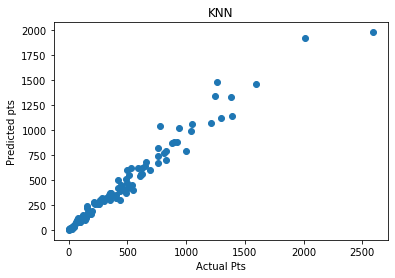

In [23]:
plt.scatter(y_test, knny_pred)
plt.xlabel("Actual Pts")
plt.ylabel("Predicted pts")
plt.title("KNN")

In [24]:
Predictions = pd.DataFrame({'Actual Points': y_test.tolist(), 'Predicted Points': knny_pred.tolist()})
Predictions

,Actual Points,Predicted Points
0,139,117.50
1,625,556.75
2,2593,1980.50
3,587,626.00
4,347,298.50
5,1394,1140.75
6,2010,1918.25
7,93,81.75
8,761,668.50
9,495,474.25


## Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [55]:
lr.fit(X_train, y_train)
model = LinearRegression().fit(X_test,y_test)
print(model.score(X_test,y_test))

1.0


In [56]:
lry_pred = model.predict(X_test)

In [57]:
yp = np.round(lry_pred,6)

Text(0.5, 1.0, 'LR')

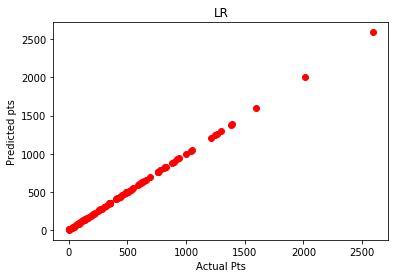

In [69]:

plt.scatter(y_test, lry_pred, color = "red" )
plt.xlabel("Actual Pts")
plt.ylabel("Predicted pts")
plt.title("LR")

In [70]:
lrpred = pd.DataFrame({'Actual Points': y_test.tolist(), 'Predicted Points': yp.tolist()})
lrpred

,Actual Points,Predicted Points
0,139,139.0
1,625,625.0
2,2593,2593.0
3,587,587.0
4,347,347.0
5,1394,1394.0
6,2010,2010.0
7,93,93.0
8,761,761.0
9,495,495.0


## Decision Tree

In [88]:
from sklearn.tree import DecisionTreeRegressor

In [89]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [90]:
dtry_pred = dtr.predict(X_test)
dtry_pred

array([ 145.,  622., 2112.,  618.,  378., 1328., 1930.,  100.,  831.,
        588.,    9.,  763.,   78.,  622.,  831.,  721.,  721.,   22.,
         86.,   22.,   42.,  403.,  544.,   92.,  144.,  224.,   48.,
        530.,  170., 1304.,  107.,  767.,    7.,  499.,  202., 1372.,
         25.,  110.,  403.,   71.,  181., 1167., 1289.,  329.,  921.,
        850.,   71.,  257.,  646.,  401.,  341.,  258.,   78., 1115.,
        770.,  490.,  781.,  146.,  401.,   84.,  197.,  490.,  618.,
        315.,  298., 1089.,  990.,  677.,  159.,  573.,  470., 1021.,
        352.,  343.,   11.,  346.,    0.,  401.,  339.,  350.,  202.,
        514., 1095.,   44.,  153.,  378., 1042.,  216.,  137.,  338.,
        530.,  343.,  401.,  401., 1134.,  338.])

Text(0.5, 1.0, 'DTR')

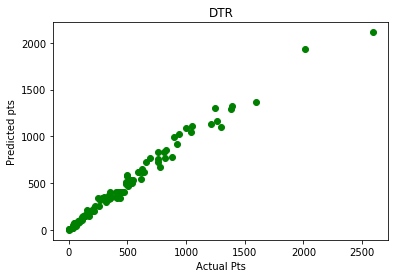

In [91]:
plt.scatter(y_test, dtry_pred, color = "green")
plt.xlabel("Actual Pts")
plt.ylabel("Predicted pts")
plt.title("DTR")

In [92]:
print(dtr.score(X_test,y_test))

0.9745030293922449


In [93]:
dtrpred = pd.DataFrame({'Actual Points': y_test.tolist(), 'Predicted Points': dtry_pred.tolist()})
dtrpred

,Actual Points,Predicted Points
0,139,145.0
1,625,622.0
2,2593,2112.0
3,587,618.0
4,347,378.0
5,1394,1328.0
6,2010,1930.0
7,93,100.0
8,761,831.0
9,495,588.0


## Comparative analysis

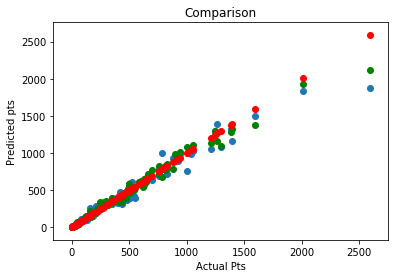

In [94]:
plt.scatter(y_test, knny_pred)
plt.scatter(y_test, dtry_pred, color = "green")
plt.scatter(y_test, lry_pred, color = "red" )

plt.xlabel("Actual Pts")
plt.ylabel("Predicted pts")
plt.title("Comparison")
plt.show()

In [95]:
cpred = pd.DataFrame({'Actual Points': y_test.tolist(), 'KNN Points': knny_pred.tolist(), 'LR Points': yp.tolist(), 'DTR Points': dtry_pred.tolist()})
cpred

,Actual Points,KNN Points,LR Points,DTR Points
0,139,131.000000,139.0,145.0
1,625,565.166667,625.0,622.0
2,2593,1869.833333,2593.0,2112.0
3,587,611.333333,587.0,618.0
4,347,313.833333,347.0,378.0
5,1394,1164.500000,1394.0,1328.0
6,2010,1829.166667,2010.0,1930.0
7,93,83.166667,93.0,100.0
8,761,689.333333,761.0,831.0
9,495,455.500000,495.0,588.0
